## Numpy

In [14]:
import numpy as np

### 1) corrcoef
Реализовать функцию расчета [коэффицента корреляции Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F#%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8) для двух numpy векторов с помощью функционала numpy (без циклов)

P.S. нельзя использовать функцию np.corrcoef

In [15]:
def corrcoef(v1, v2):
    if len(v1) != len(v2):
        raise ValueError("Vectors must be of the same length.")

    v1 = np.array(v1)
    v2 = np.array(v2)

    mean_v1 = np.mean(v1)
    mean_v2 = np.mean(v2)

    numerator = np.sum((v1 - mean_v1) * (v2 - mean_v2))
    denominator = np.sqrt(np.sum((v1 - mean_v1) ** 2) * np.sum((v2 - mean_v2) ** 2))

    if denominator == 0:
        return 0.0

    return numerator / denominator

In [16]:
# Test 1
v1 = np.random.rand(100)
v2 = np.random.rand(100)
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

In [17]:
# Test 2
v1 = np.array([1, 2, 3])
v2 = np.array([1, 2, 3])
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

In [18]:
# Test 3
v1 = np.random.normal(loc=0, scale=1, size=100)
v2 = v1 + 0.2 * np.random.rand(100)
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

### 2) isna
Реализовать функцию, которая принимает произвольный ndarray и возвращает ndarray с таким же shape со значениями True или False в зависимости был ли np.nan в этом месте в оригинальном ndarray

Например: для массива isna(np.array([1, 2, np.nan, 3])) -> np.array([False, False, True, False])

In [19]:
def isna(x: np.ndarray):
    return x != x

In [20]:
# Test 1

a = np.ones(10)
a[0] = np.nan
a[1] = None

assert (isna(a) == np.isnan(a)).all()

In [21]:
# Test 2

a = np.ones((10, 10))
a[0][5] = np.nan
a[9][2] = np.nan

assert (isna(a) == np.isnan(a)).all()

### 3) dist
Реализовать функцию dist(v1, v2), которая принимает на вход два вектора с одинаковым shape, и возвращает число - [евклидово расстояние](https://ru.wikipedia.org/wiki/Евклидова_метрика) между ними.

Так же нельзя использовать циклы и np.linagl.norm

In [22]:
def dist(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)

    squared_diff = (v1 - v2) ** 2

    return np.sqrt(np.sum(squared_diff))

In [23]:
# Test 1
v1 = np.array([0, 0, 1])
v2 = np.array([0, 0, 0])

assert dist(v1, v2).round(8) == np.linalg.norm(v1 - v2).round(8)

In [24]:
# Test 2
v1 = np.array([2, 3, 1])
v2 = np.array([0, 0, 0])

assert dist(v1, v2).round(8) == np.linalg.norm(v1 - v2).round(8)

In [25]:
# Test 3
v1 = np.random.rand(100)
v2 = np.random.rand(100)

assert dist(v1, v2).round(8) == np.linalg.norm(v1 - v2).round(8)

## Pandas

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./house_prices.csv')

### Анализ домов
Поиграться с датасетом цен на дома

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

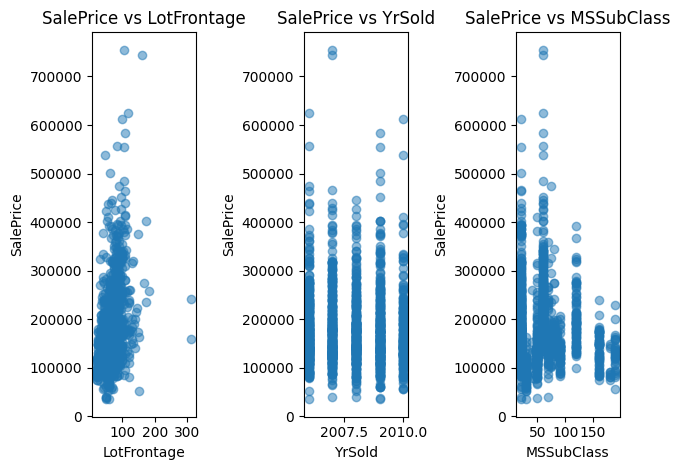

In [28]:
numeric_cols = ['LotFrontage', 'YrSold', 'MSSubClass']

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    plt.scatter(df[col], df['SalePrice'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs {col}')

plt.tight_layout()
plt.show()

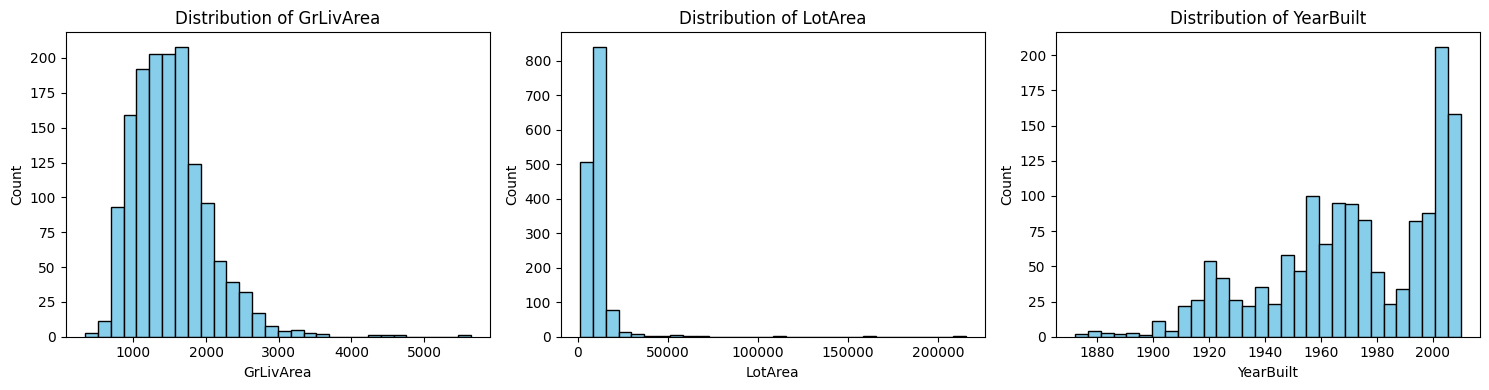

In [29]:
hist_cols = ['GrLivArea', 'LotArea', 'YearBuilt']

plt.figure(figsize=(15, 4))

for i, col in enumerate(hist_cols):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [30]:
with_pool = df[df['PoolArea'] > 0]['SalePrice'].mean()

without_pool = df[df['PoolArea'] == 0]['SalePrice'].mean()

print(f"Средняя цена дома с бассейном: {with_pool:,.2f}")
print(f"Средняя цена дома без бассейна: {without_pool:,.2f}")


Средняя цена дома с бассейном: 288,138.57
Средняя цена дома без бассейна: 180,404.66


In [31]:
cat_cols = ['Neighborhood', 'LandSlope', 'SaleCondition']

for col in cat_cols:
    print(f"Распределение по колонке: {col}")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Распределение по колонке: Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

--------------------------------------------------

Распределение по колонке: LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

--------------------------------------------------

Распределение по колонке: SaleCondition
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

--------------------------------------------------



## Scikit-learn

### Wine

In [32]:
from sklearn.datasets import load_wine

In [33]:
wine_data = load_wine()

In [34]:
wine_df = pd.DataFrame.from_records(wine_data['data'], columns=wine_data['feature_names'])
wine_df['target'] = wine_data['target']
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


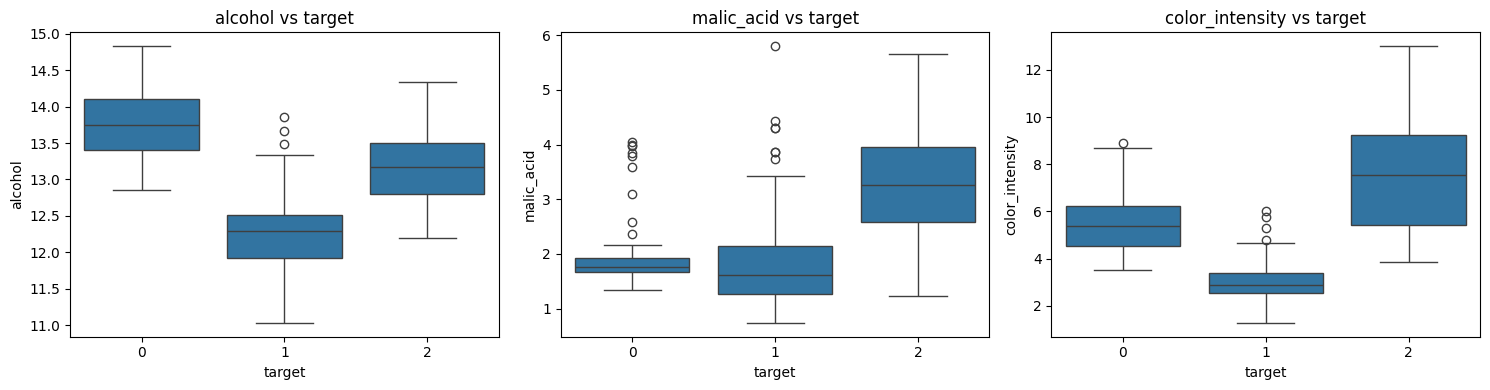

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['alcohol', 'malic_acid', 'color_intensity']

plt.figure(figsize=(15, 4))

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=wine_df, x='target', y=col)
    plt.title(f'{col} vs target')

plt.tight_layout()
plt.show()

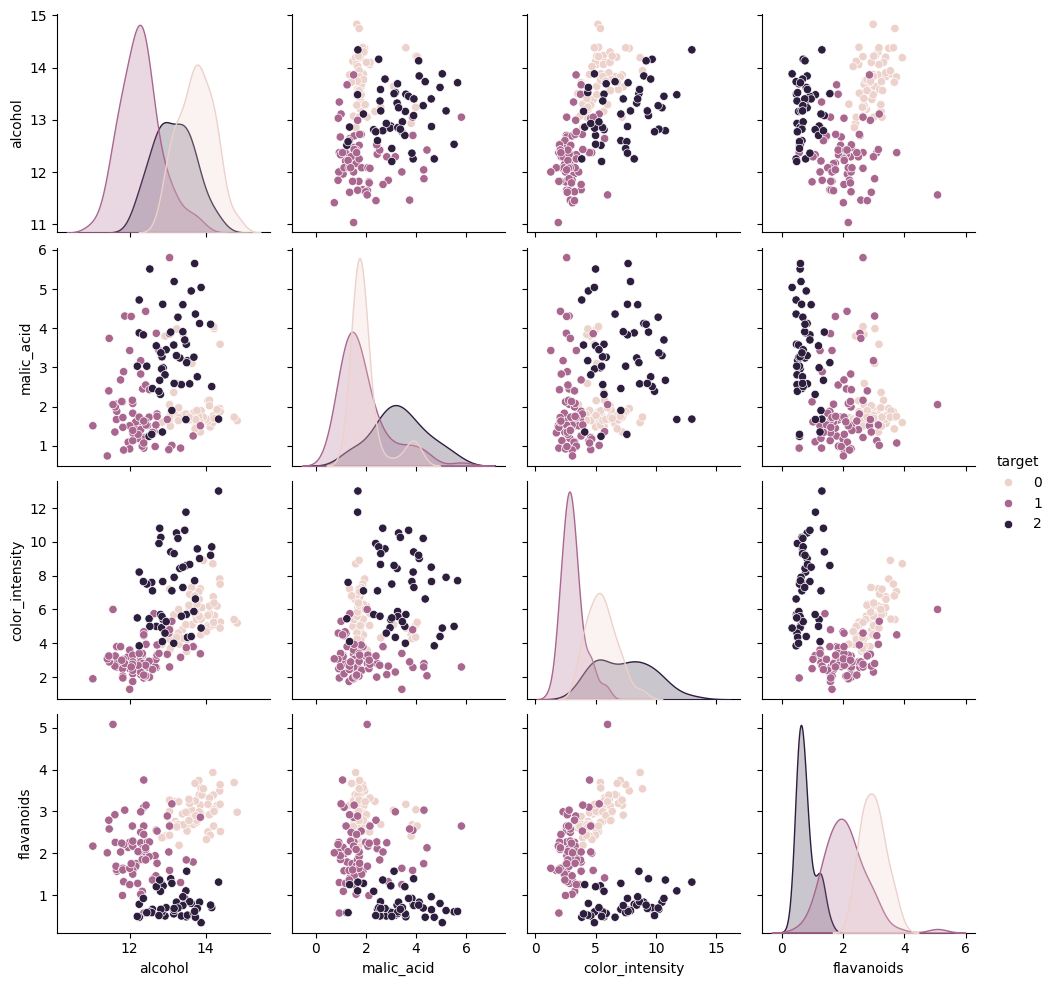

In [36]:
subset = wine_df[['alcohol', 'malic_acid', 'color_intensity', 'flavanoids', 'target']]
sns.pairplot(subset, hue='target')
plt.show()
